In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
banka = pd.read_csv("/content/drive/MyDrive/Bankruptcy.csv",
                    index_col = 0)

In [ ]:
banka.head()

D  YR    R1    R2    R3    R4    R5    R6    R7     R8  ...   R15   R16  \
NO                                                          ...               
1   0  78  0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  ...  0.05  0.57   
2   0  77  0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  ...  0.09  0.12   
3   0  72  0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  ... -0.03  0.02   
4   0  80  0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  ... -0.02  0.01   
5   0  81  0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  ...  0.02  0.07   

     R17   R18    R19   R20   R21   R22   R23   R24  
NO                                                   
1   0.15  0.23   3.56  0.26  1.55  0.43  0.11  0.17  
2   0.16  0.22   3.78  1.29  1.40  0.06  0.07  0.10  
3   0.02  0.04  13.29  1.61  1.43  0.03  0.05  0.07  
4   0.02  0.02   5.36  1.30  1.12 -0.06 -0.08 -0.09  
5   0.10  0.14   7.74  1.48  1.41  0.03  0.04  0.06  

[5 rows x 26 columns]

In [ ]:
y = banka["D"]
X = banka.drop(["D", "YR"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [ ]:
mm = MinMaxScaler()

X_train_scl = mm.fit_transform(X_train)
X_test_scl = mm.fit_transform(X_test)

# Model Definition

In [ ]:
tf.random.set_seed(2022)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense( 20, activation = "relu", input_shape = (24,) ),
    # Above codeline created hidden layers of 20 with input as 24
    tf.keras.layers.Dense(10, activation ="relu"),
    tf.keras.layers.Dense(5, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")   
])

In [ ]:
# Dense called for both hidden as well as output layers.
# Sigmoid is good for the last generally, here done at last because this is a classification problem.

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                500       
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 5)                 55        
                                                                 
 dense_27 (Dense)            (None, 20)                120       
                                                                 
Total params: 885
Trainable params: 885
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer = "sgd",
              loss = tf.keras.losses.BinaryFocalCrossentropy())

In [ ]:
history  = model.fit(X_train_scl, y_train,
                     validation_data = (X_test_scl, y_test),
                     epochs = 1000)

Epoch 1/1000
3/3 [==============================] - 1s 98ms/step - loss: 0.1763 - val_loss: 0.1669
Epoch 2/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1761 - val_loss: 0.1668
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.1759 - val_loss: 0.1666
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.1756 - val_loss: 0.1665
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1754 - val_loss: 0.1664
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1752 - val_loss: 0.1662
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1750 - val_loss: 0.1661
Epoch 8/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.1748 - val_loss: 0.1660
Epoch 9/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1746 - val_loss: 0.1659
Epoch 10/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1745 - val_loss: 0.1658
Epoch 11/

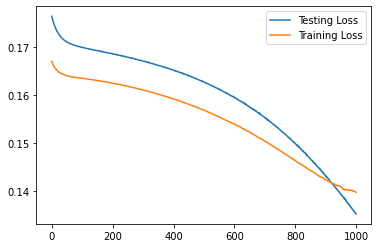

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Testing Loss")
plt.plot(history.history["val_loss"], label = "Training Loss")
plt.legend(loc = "best")
plt.show()

# Early Stopping

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense( 20, activation = "relu", input_shape = (24,) ),
    # Above codeline created hidden layers of 20 with input as 24
    tf.keras.layers.Dense(10, activation ="relu"),
    tf.keras.layers.Dense(5, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")   
])

In [ ]:
model.compile(optimizer = "RMSprop",
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])

Let us see the parameters in the early stopping involved:
- **monitor**: quantity to be monitored.<br>
- **min_delta**: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.<br>
- **patience**: number of epochs with no improvement after which training will be stopped.<br>
- **restore_best_weights**: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping( monitor="val_loss", min_delta = 0.0001,
                      patience = 15, verbose = 3,
                      restore_best_weights = True)


In [ ]:
history = model.fit(X_train_scl, y_train, validation_data = (X_test_scl, y_test),
                    epochs = 1000,
                    callbacks = [early])

3/3 [==============================] - 0s 19ms/step - loss: 0.6898 - val_loss: 0.6850
Epoch 49/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6896 - val_loss: 0.6848
Epoch 50/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6898 - val_loss: 0.6848
Epoch 51/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6894 - val_loss: 0.6846
Epoch 52/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6893 - val_loss: 0.6845
Epoch 53/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.6892 - val_loss: 0.6843
Epoch 54/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6890 - val_loss: 0.6842
Epoch 55/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6890 - val_loss: 0.6840
Epoch 56/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6891 - val_loss: 0.6838
Epoch 57/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6889 - val_loss: 0.6837
Epoch 58/1000


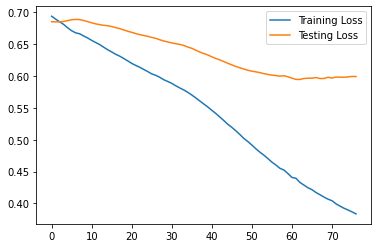

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Testing Loss")
plt.legend(loc = "best")
plt.show()

## L1 Regulariser

In [ ]:
tf.random.set_seed(2022)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation = "relu",
                          input_shape = (24,),
                          kernel_regularizer = tf.keras.regularizers.L1()),
    tf.keras.layers.Dense(10, activation = "relu",
                          kernel_regularizer = tf.keras.regularizers.L1()),
    tf.keras.layers.Dense(5, activation = "relu",
                          kernel_regularizer = tf.keras.regularizers.L1()),
    tf.keras.layers.Dense(1, activation = "sigmoid",
                          kernel_regularizer = tf.keras.regularizers.L1())
])

In [ ]:
model.compile(optimizer = "RMSprop",
              loss = tf.keras.losses.BinaryFocalCrossentropy(), metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train_scl,
                    y_train,
                    validation_data = (X_test_scl, y_test),
                    epochs = 1000)

Epoch 1/1000
3/3 [==============================] - 2s 130ms/step - loss: 1.6819 - accuracy: 0.5000 - val_loss: 1.6396 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.6364 - accuracy: 0.5109 - val_loss: 1.6062 - val_accuracy: 0.5250
Epoch 3/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.6048 - accuracy: 0.5109 - val_loss: 1.5784 - val_accuracy: 0.5250
Epoch 4/1000
3/3 [==============================] - 0s 30ms/step - loss: 1.5776 - accuracy: 0.5109 - val_loss: 1.5533 - val_accuracy: 0.5500
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.5529 - accuracy: 0.5109 - val_loss: 1.5300 - val_accuracy: 0.5750
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.5295 - accuracy: 0.5109 - val_loss: 1.5077 - val_accuracy: 0.6000
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5072 - accuracy: 0.5109 - val_loss: 1.4861 - val_accuracy: 0.6250
Epoch 8/1000

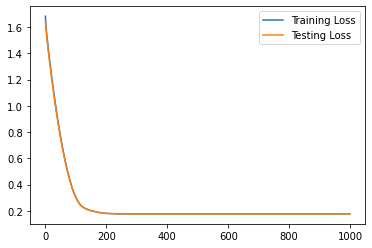

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

## L2 Regularizer

In [ ]:
tf.random.set_seed(2022)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu',input_shape=(24,),
                          kernel_regularizer = tf.keras.regularizers.L2()), 
    tf.keras.layers.Dense(10, activation = 'relu',
                          kernel_regularizer = tf.keras.regularizers.L2()), 
    tf.keras.layers.Dense(5, activation='relu',
                          kernel_regularizer = tf.keras.regularizers.L2()), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [ ]:
model.compile(optimizer='RMSprop',
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scl, y_train, validation_data=(X_test_scl, y_test),
                    epochs=1000)

Epoch 1/1000
3/3 [==============================] - 2s 196ms/step - loss: 1.1119 - accuracy: 0.5000 - val_loss: 1.0855 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 41ms/step - loss: 1.0941 - accuracy: 0.5000 - val_loss: 1.0730 - val_accuracy: 0.5000
Epoch 3/1000
3/3 [==============================] - 0s 29ms/step - loss: 1.0820 - accuracy: 0.5000 - val_loss: 1.0629 - val_accuracy: 0.5000
Epoch 4/1000
3/3 [==============================] - 0s 33ms/step - loss: 1.0716 - accuracy: 0.5000 - val_loss: 1.0538 - val_accuracy: 0.5000
Epoch 5/1000
3/3 [==============================] - 0s 32ms/step - loss: 1.0625 - accuracy: 0.5000 - val_loss: 1.0454 - val_accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 25ms/step - loss: 1.0537 - accuracy: 0.5000 - val_loss: 1.0375 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.0454 - accuracy: 0.5109 - val_loss: 1.0298 - val_accuracy: 0.5000
Epoch 8/1000

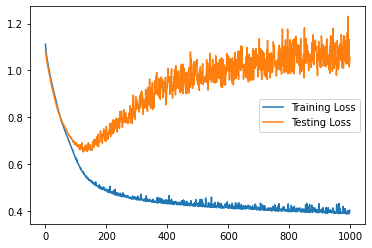

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

## L1L2

In [ ]:
tf.random.set_seed(2022)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(24,),
                          kernel_regularizer=tf.keras.regularizers.L1L2()), 
    tf.keras.layers.Dense(10, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2()), 
    tf.keras.layers.Dense(5, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2()), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

## Using Adam

In [ ]:
## adam instead of sgd

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense( 20, activation = "relu", input_shape = (24,) ),
    # Above codeline created hidden layers of 20 with input as 24
    tf.keras.layers.Dense(10, activation ="relu"),
    tf.keras.layers.Dense(5, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")   
])

In [ ]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.BinaryCrossentropy())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping( monitor="val_loss", min_delta = 0.0001,
                      patience = 15, verbose = 3,
                      restore_best_weights = True)

In [ ]:
history = model.fit(X_train_scl, y_train, validation_data = (X_test_scl, y_test),
                    epochs = 1000,
                    callbacks = [early])

Epoch 1/1000
3/3 [==============================] - 1s 161ms/step - loss: 0.6940 - val_loss: 0.6853
Epoch 2/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.6894 - val_loss: 0.6852
Epoch 3/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.6852 - val_loss: 0.6851
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6811 - val_loss: 0.6858
Epoch 5/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.6758 - val_loss: 0.6871
Epoch 6/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.6712 - val_loss: 0.6885
Epoch 7/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.6678 - val_loss: 0.6890
Epoch 8/1000
3/3 [==============================] - 0s 83ms/step - loss: 0.6664 - val_loss: 0.6887
Epoch 9/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.6629 - val_loss: 0.6873
Epoch 10/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.6598 - val_loss: 0.6855
Epoch 11

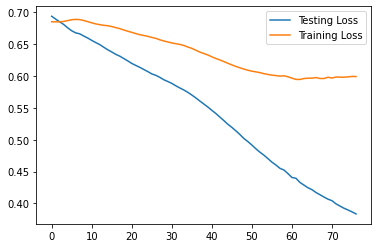

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Testing Loss")
plt.plot(history.history["val_loss"], label = "Training Loss")
plt.legend(loc = "best")
plt.show()